In [1]:
ls Data

ACS_16_5YR_B01001_with_ann.csv  ACS_16_5YR_B19001_with_ann.csv
ACS_16_5YR_B01002_with_ann.csv  ACS_16_5YR_B19013_with_ann.csv
ACS_16_5YR_B02001_with_ann.csv  FCC_data.csv
ACS_16_5YR_B03003_with_ann.csv  Income_by_race/


In [2]:
import transform 
import pandas as pd
import numpy as np

# Read in Data - > Transform

In [3]:
df = transform.load_all('Data')
#xs = transform.transform_B19001(xs)
#ys = pd.read_csv('./Data/FCC_deps.csv')

In [4]:
df['bcat_10x_1'] = np.where(df['pcat_10x1_mean']>3, 1,0)

In [5]:
df['bcat_10x_1'].value_counts()

1    610
0    443
Name: bcat_10x_1, dtype: int64

# Choose Columns 

In [6]:
X_cols = list(df.columns[1:-3])


y_col = [df.columns[-1]]
y_col = 'pcat_10x1_mean'

In [7]:
X_cols = [
 'pop_tot',
 'income_median',
 'income_0-19k_p',
 'income_20-24k_p',
 'income_25-39k_p',
 'income_40-64k_p',
 'income_65k+_p',
 'White_p',
 'African_American_p',
 'Native_American_p',
 'Asian_p',
 'Hawaiian_Pac_Islander_p',
 'Hispanic/Latino_p']

# Modeling

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Split -> Train -> Predict

In [9]:
train,test = train_test_split(df)
model = KNN()
model = DecisionTreeClassifier(max_depth=3)
#model = LogisticRegression()
model.fit(train[X_cols],train[y_col])
train['predicted'] = model.predict(train[X_cols])
accuracy_score(train['predicted'],train[y_col])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.6134347275031685

In [10]:
train.shape

(789, 28)

## Run on Test and Evaluate

In [11]:
test['predicted'] = model.predict(test[X_cols])
accuracy_score(test['predicted'],test[y_col])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.5454545454545454

In [12]:
f1_score(test['predicted'],test[y_col])

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [13]:
confusion_matrix(test['predicted'],test[y_col])

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0, 29, 53, 19,  1],
       [ 2,  5, 16, 46, 28],
       [ 0,  0,  1, 19, 45]])

In [14]:
{col: model.coef_[0][index] for index, col in enumerate(X_cols)}
    

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'

In [15]:
x = tree.export_graphviz(model,feature_names=X_cols)

In [16]:
import graphviz

In [17]:
x.replace

<function str.replace(old, new, count=-1, /)>

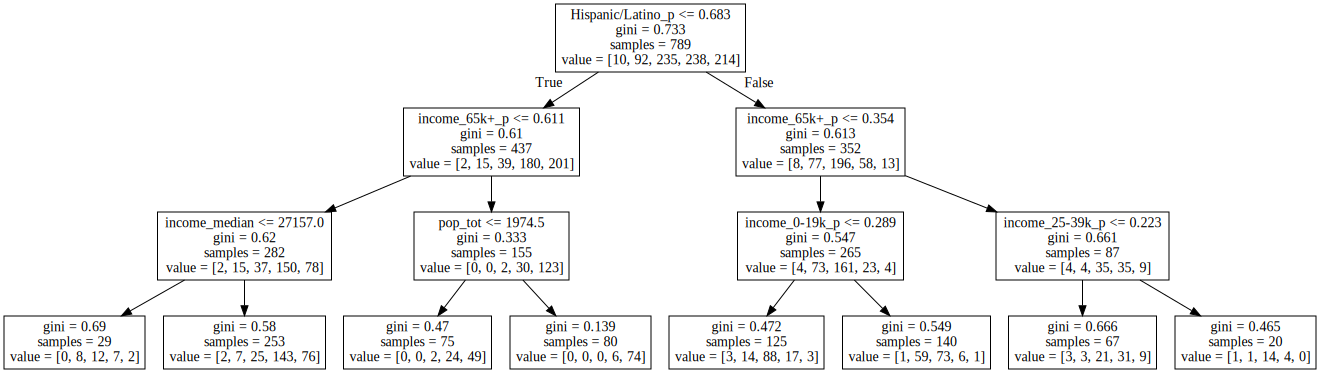

In [18]:
graphviz.Source(x)